## Lab 4

## import libs & connect to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws'] ['host']
db = config['myaws'] ['db']
user = config['myaws'] ['user']
pwd = config['myaws'] ['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                            )

In [4]:
cur = conn.cursor()

## q1

In [5]:
sql_q1 = """
        select * from gp25.student
        """

In [6]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,garveyrm@dukes.jmu.edu,ryan garvey,IA
1,etherhj@dukes.jmu.edu,James Etheridge,GIS
2,Cornellbt@dukes.jmu.edu,Bradley Cornell,COB
3,carmeloanthony@dukes.jmu.edu,Carmelo Anthony,IA


## q2

In [7]:
sql_q2 = """
        select gp25.professor.p_name,
        gp25.course.c_name
        from gp25.professor
        inner join gp25.course
        on gp25.professor.p_email = gp25.course.p_email
        """

In [8]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,data mining
1,Noel Hendrickson,counterfactual reasoning
2,Mona K Sameni,intro to microeconomics
3,Mona K Sameni,issues in modern production systems
4,new_p,basketball


## q3

In [9]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp25.enroll_list
        group by c_number
        order by enrolled desc
        """

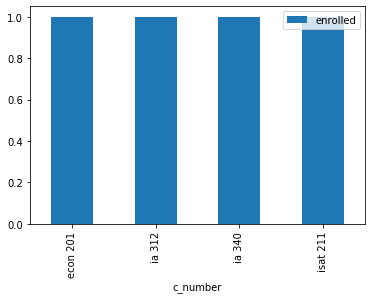

In [10]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [11]:
sql_q4 = """
        select gp25.professor.p_name,
        count(gp25.course.c_name) as teaching_number
        from gp25.professor
        inner join gp25.course
        on gp25.professor.p_email = gp25.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

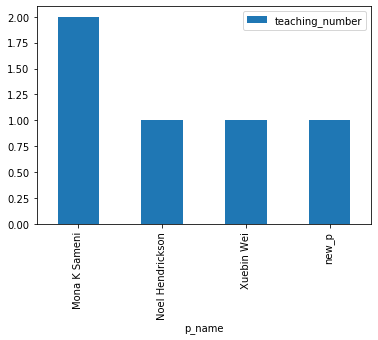

In [12]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [13]:
sql_q5_professor = """
                    insert into gp25.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('joe@jmu.edu','edy bo','CIS')

In [14]:
cur.execute(sql_q5_professor)

In [15]:
conn.commit()

In [16]:
df=pandas.read_sql_query('select * from gp25.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,hhs112
1,khademmx@jmu.edu,Mona K Sameni,burrus 201
2,Hendrix@jmu.edu,Noel Hendrickson,engeo 3302
3,papak@jmu.edu,Maria Papadakis,isat 2112
4,new_p@jmu.edu,new_p,new_office
5,hendi@dukes,hendi man,the moon
6,einstein@gmail.com,ALby einstein,the sun
7,shaq@nba.com,shaquille oneill,mars
8,presalger@uva.com,Jonathon Alger,saturn
9,eddy@jmu.edu,eddy jo,CS


In [19]:
sql_q5_course = """
                    insert into gp25.course(c_number,c_name,r_number,p_email)
                    values('{}','{}','{}')
                    """.format('z101','boos','online','joe@jmu.edu')

In [20]:
cur.execute(sql_q5_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [21]:
conn.commit()

In [22]:
df= pandas.read_sql_query('select * from gp25.course',conn)
df[:]

,c_number,c_name,r_number,p_email
0,ia 340,data mining,online,weixx@jmu.edu
1,ia 312,counterfactual reasoning,online,Hendrix@jmu.edu
2,econ 201,intro to microeconomics,online,khademmx@jmu.edu
3,isat 211,issues in modern production systems,online,khademmx@jmu.edu
4,ball 800,basketball,the moon,new_p@jmu.edu


## q6

In [23]:
sql_q6_course = """
                update gp25.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_gal@jmu','new_guy@jmu.edu')

In [24]:
cur.execute(sql_q6_course)

In [25]:
conn.commit()

In [26]:
df= pandas.read_sql_query('select * from gp25.course',conn)
df[:]

,c_number,c_name,r_number,p_email
0,ia 340,data mining,online,weixx@jmu.edu
1,ia 312,counterfactual reasoning,online,Hendrix@jmu.edu
2,econ 201,intro to microeconomics,online,khademmx@jmu.edu
3,isat 211,issues in modern production systems,online,khademmx@jmu.edu
4,ball 800,basketball,the moon,new_p@jmu.edu


In [27]:
sql_q6_professor = """
                    delete from gp25.professor
                    where p_email = '()'
                    """.format('new_guy@jmu.edu')

In [29]:
cur.execute(sql_q6_professor)

In [30]:
conn.commit()

In [3]:
df=pandas.read_sql_query('select * from gp25.professor',conn)
df[:]

NameError: name 'pandas' is not defined

Note: i could not solve the two errors. 